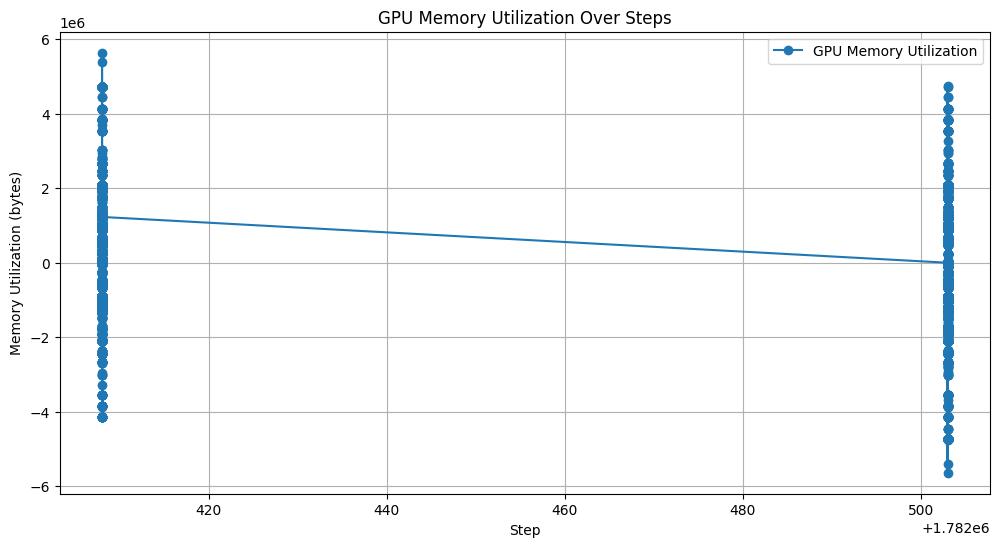

In [12]:
import os
import json
import pandas as pd

# Directory containing JSON files
log_dir = '/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2'
json_files = [os.path.join(log_dir, f) for f in os.listdir(log_dir) if f.endswith('.json')]

# Load JSON data from all files
data_list = []
for json_file in json_files:
    with open(json_file, 'r') as f:
        data_list.append(json.load(f))
        
def extract_memory_data(json_data):
    events = json_data.get('traceEvents', [])
    steps = []
    memory_utilization = []

    for event in events:
        if event["ph"] == 'i' and 'args' in event and 'Bytes' in event['args']:
            steps.append(event['tid'])
            # Adjust this based on the actual structure found in JSON
            memory_utilization.append(event['args'].get('Bytes', 0))  

    return pd.DataFrame({'Step': steps, 'Memory (bytes)': memory_utilization})

# Extract memory utilization data from all JSON files
dfs = [extract_memory_data(data_list[0])] #[extract_memory_data(data) for data in data_list]

# Combine all DataFrames into a single DataFrame
df_combined = pd.concat(dfs).reset_index(drop=True)

# Optionally, sort by steps
df_combined = df_combined.sort_values(by='Step').reset_index(drop=True)

# Plotting the memory utilization data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_combined['Step'], df_combined['Memory (bytes)'], label='GPU Memory Utilization', marker='o')

plt.xlabel('Step')
plt.ylabel('Memory Utilization (bytes)')
plt.title('GPU Memory Utilization Over Steps')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import torch.profiler

prof = torch.profiler.profile(activities=[torch.profiler.ProfilerActivity.CPU, torch.profiler.ProfilerActivity.CUDA])

prof.export_chrome_trace(path="/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717608861277899.pt.trace.json")

AssertionError: 

In [13]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 40.9 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [15]:
import wandb

with wandb.init(project="my-profiling-project") as run:
  profile_art = wandb.Artifact("trace", type="profile")
  profile_art.add_file("/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717608861277899.pt.trace.json", 
                       "/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717613665032641.pt.trace.json"
                       "/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717618429779691.pt.trace.json"
                       "/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717623407651727.pt.trace.json"
                       "/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717628404936063.pt.trace.json"
                       "/home/zfulop/FoMo-LoRA/notebooks/logs/dynalora_qv_rand16_periodic50_sst2/gcn57.local.snellius.surf.nl_1782408.1716717633326566519.pt.trace.json")
  run.log_artifact(profile_art)


          Random  Dyna Smulti  Dina Smulti
Module                                    
1       0.442385     0.391727     0.485139
2       0.417013     0.383391     0.550109
3       0.488375     0.441399     0.552139
4       0.488515     0.515279     0.567550
5       0.481753     0.504599     0.578205
6       0.523405     0.546897     0.588354
7       0.541659     0.562430     0.605682
8       0.593084     0.580628     0.590595


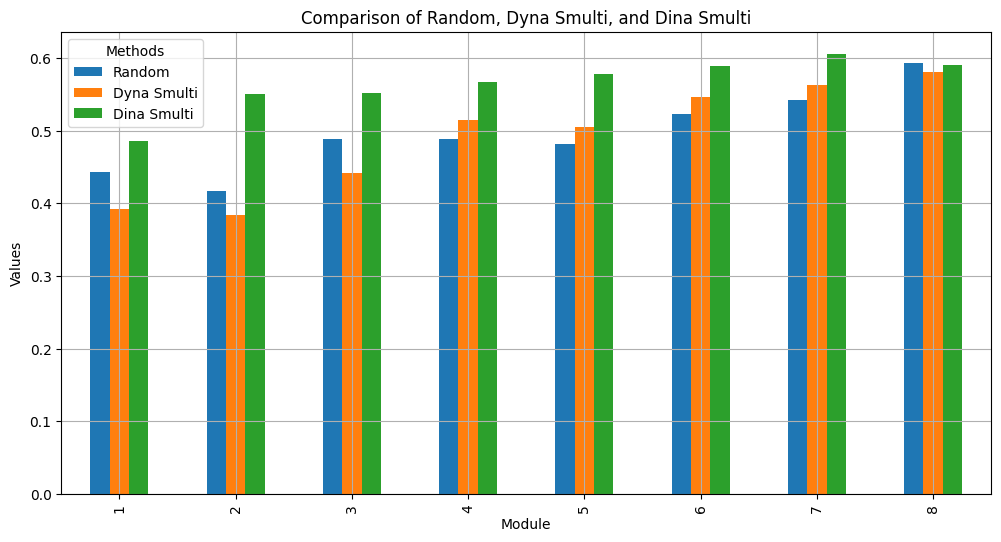

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
"""
data = {
    "Module": [4, 8, 12, 16, 20, 24],
    "Random": [ 0.4885148342615617, 0.5930837029344534, 0.5828923211172198, 0.6308143863677894, 0.6107363335829461, 0.625700128214775],
    "Dyna Smulti": [0.5152794748216469, 0.5806284057433418, 0.5805300925831498, 0.6135933777663026, 0.6182197264087645, 0.6232164195970928],
    "Dina Smulti": [0.567550266689718, 0.5905946226995304, 0.5880544551678445, 0.6232164195970928, 0.5859983483284835, 0.6097804486545971]
}
"""
data = {
    "Module": [1, 2, 3, 4, 5, 6, 7, 8],
    "Random": [ 0.4423846949106454, 0.41701318265409026, 0.4883748469597473, 0.4885148342615617, 0.4817525012062335, 0.5234048301750471, 0.5416589932124241, 0.5930837029344534 ],
    "Dyna Smulti": [ 0.39172657465625493,  0.38339074887468044, 0.44139859096432776, 0.5152794748216469, 0.5045993817720598, 0.5468969938757886, 0.5624297390215861, 0.5806284057433418 ],
    "Dina Smulti": [ 0.48513922800011067, 0.5501090458146111, 0.5521390429003941, 0.567550266689718, 0.5782054486858687, 0.5883537726521672, 0.6056824785510757, 0.5905946226995304 ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Setting 'Module' as the index
df.set_index('Module', inplace=True)

# Display the DataFrame
print(df)

# Plotting the bar plot
df.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Module')
plt.ylabel('Values')
plt.title('Comparison of Random, Dyna Smulti, and Dina Smulti')
plt.legend(title='Methods')
plt.grid(True)
plt.show()